## 자동차 연비 데이터셋

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/auto+mpg)에서 다운로드
 
 
- [Kaggle](https://www.kaggle.com/)의
[Auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset)에서 다운로드

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. 데이터 탐색

#### 1.1 데이터 적재

In [30]:
df=pd.read_csv('C:/Users/User/Desktop/코딩/수업자료/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### 1.2 데이터 일부 확인

In [32]:
df=pd.read_csv('C:/Users/User/Desktop/코딩/수업자료/auto-mpg.csv')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


0. mpg: continuous
1. cylinders: multi-valued discrete
2. displacement: continuous
3. horsepower: continuous
4. weight: continuous
5. acceleration: continuous
6. model year: multi-valued discrete
7. origin: multi-valued discrete
8. car name: string (unique for each instance)

#### 1.3 열 이름 지정

* 예 : ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

In [34]:
df.columns= ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


- mpg : 연비
- cylinders : 실린더수 
- displacement : 배기량
- horsepower: 출력
- weight : 차중
- acceleration : 가속능력
- model year : 출시년도
- origin : 제조국 1(USA), 2(EU), 3(JPN)
- name : 모델명

#### 1.4 데이터 형상 확인

In [38]:
df.shape

(398, 9)

#### 1.5 데이터 요약정보 확인(데이터 타입, 누락정보)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### 1.6 데이터 자료형 확인 

In [36]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

#### 1.7 Series(horsepower 열)의 자료형 확인 

In [41]:
df['horsepower'].dtypes

dtype('O')

* (Question) horsepower는 숫자 데이터인데 왜 object 형으로 반환되었을까?
* (Answer) 

In [ ]:
# 벨류 값에 '?' 가 들어가 있음 즉 숫자가 아닌 다른것이 들어가 있어서 오브젝트로 나옴 !

#### 1.8 제조국(origin) 특성의 데이터 분포(건수) 확인하기
- 1(USA), 2(EU), 3(JPN)

In [48]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

#### 1.9 제조국(origin) 특성을 histogram으로 표현하기

<AxesSubplot:>

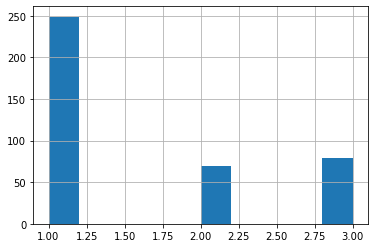

In [50]:
df['origin'].hist()

#### 1.10 coutry 컬럼 추가하기
* 제조국 1, 2, 3을 각각 "USA", "Europe", "Japan"으로 대체한 값을 새로운 컬럼(country)에 적용하기

In [54]:
df['country'] = df['origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,country
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,USA
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,USA
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,USA
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,USA
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,USA


* coutry 특성으로 groupby하여 "국가당 몇건"의 샘플이 있는지 확인하기

In [57]:
df.groupby('country').size()

country
Europe     70
Japan      79
USA       249
dtype: int64

In [60]:
a=pd.value_counts(df['country'])

- 위에서 구한 국가당 레코드수를 파이차트 그리기

<AxesSubplot:ylabel='country'>

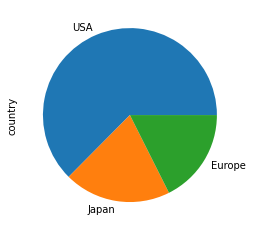

In [61]:
a.plot(kind='pie')

#### 1.11 국가별(country) mpg 값의 분포를 boxplot으로 확인하기
- (Question) mpg의 중간값이 가장 낮은 국가는?
- (Answer) USA 

In [63]:
df['mpg'].median()

23.0

<AxesSubplot:xlabel='mpg', ylabel='country'>

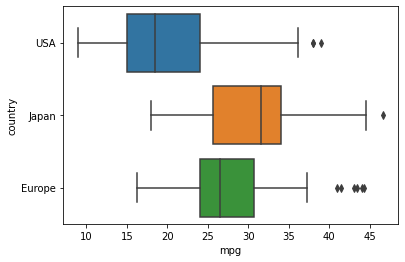

In [65]:
sns.boxplot(data=df, x="mpg", y="country") #수염 상자 그래프로 확인하면 USA가 중간값이 제일 낮음 !!

#### 1.12 통계 정보 확인 

In [66]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### 1.13 특성들 간의 상관관계 구하기 

- 상관계수 매트릭스 : df.corr() 이용

In [74]:
c=df.corr()
c

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


- (시각화 1) 상관계수 산점도로 시각화 하기 : pd.plotting.scatter_matrix()

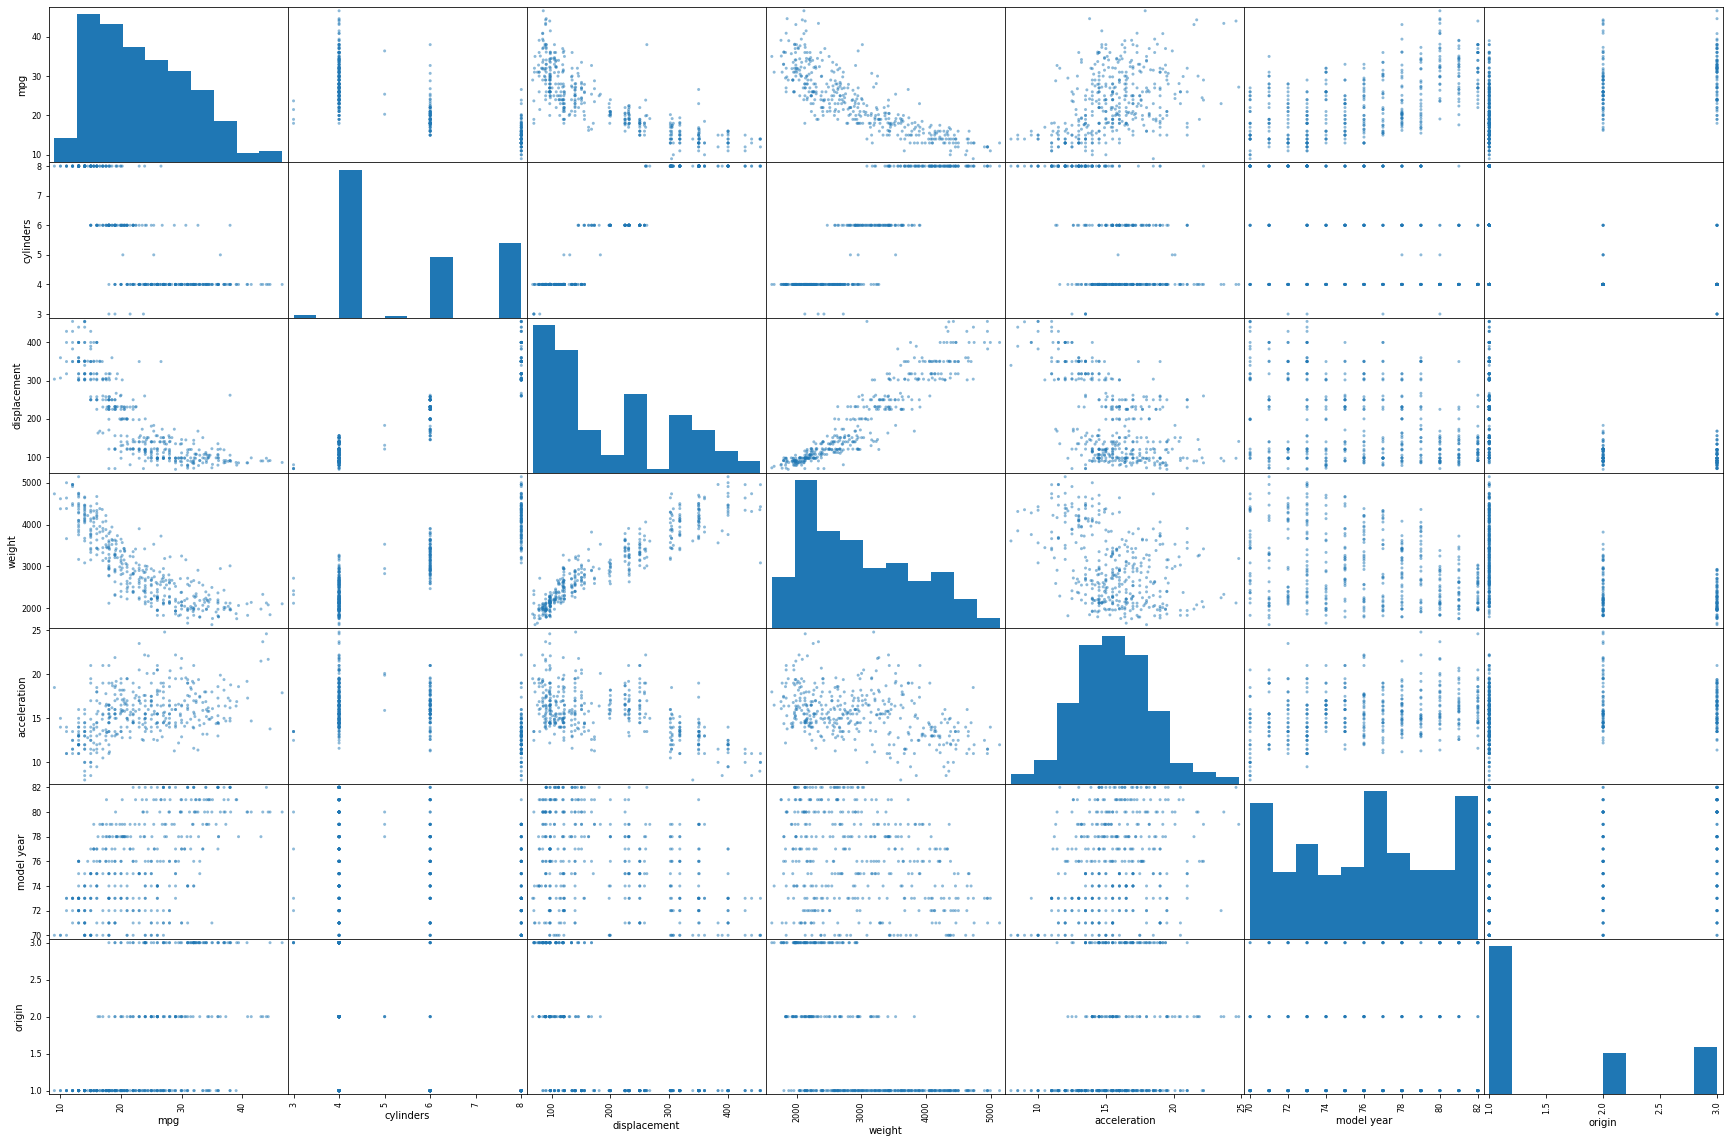

In [71]:
b=pd.plotting.scatter_matrix(df, figsize=(30, 20))# figsize 요 함수로 크기 조절 가능 !!

- (시각화 2) 상관계수 히트맵으로 시각화하기

<AxesSubplot:>

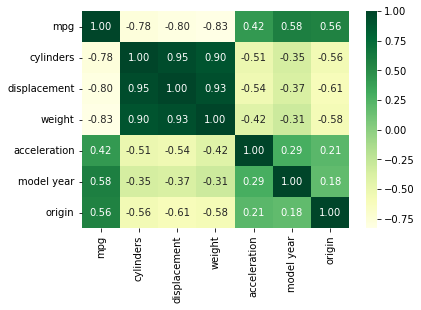

In [77]:
sns.heatmap(c, annot=True, fmt='.2f', cmap='YlGn') #annot=True 숫자 추가 가능 !

<AxesSubplot:>

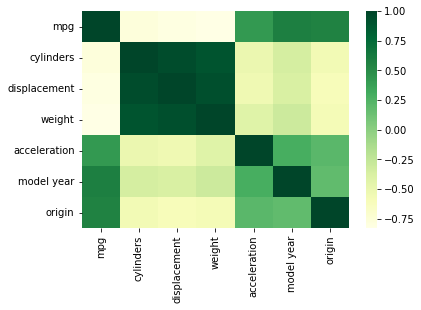

In [79]:
sns.heatmap(c, cmap='YlGn')

* (Question) 타깃(mpg)와의 상관계수가 가장 높은 특성은?
* (Answer) 

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

- weight 특성과, mpg(타깃) 의 상관관계 및 산점도

<AxesSubplot:xlabel='weight', ylabel='mpg'>

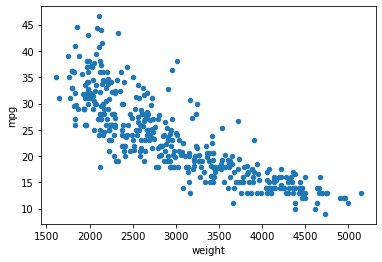

In [81]:
df.plot(kind='scatter', x='weight', y='mpg')

<AxesSubplot:xlabel='weight', ylabel='mpg'>

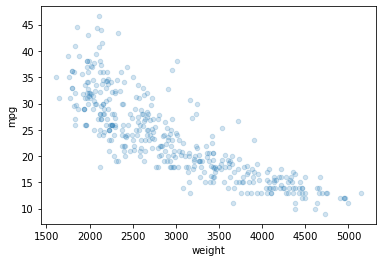

In [86]:
df.plot(kind='scatter', x='weight', y='mpg', alpha=0.2) # alpha 추가로 투명도 설정 가능 !!

## 2. 데이터 처리

### 2.1 누락데이터 처리하기

- horsepower 열의 ('?')를 np.nan으로 변경

In [87]:
df['horsepower'].replace('?', np.nan, inplace=True)

In [88]:
df['horsepower'].isin(['?']).sum()

0

In [89]:
df['horsepower'].isnull().sum()

6

- 누락 데이터 삭제하기(행삭제)

In [97]:
df.dropna(axis=0,inplace=True)# inplace=True 이걸 써야 결과값이 저장됨 !


In [96]:
df['horsepower'].isnull().sum()

0

- horsepower 컬럼의 데이터 타입을 실수형으로 변환

In [98]:
df['horsepower'].dtypes

dtype('O')

In [99]:
df['horsepower']= df['horsepower'].astype('float64')

In [100]:
df['horsepower'].dtypes

dtype('float64')

### 2.2 데이터 구간 분할

- horsepower 컬럼에 대해 3개의 구간으로 나누어 범주화 하기
- 예) 저출력, 보통출력, 고출력

In [102]:
e=pd.cut(df['horsepower'], 3, labels=['저출력', '보통출력', '고출력'])
e

0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: horsepower, Length: 392, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [103]:
e.value_counts()

저출력     257
보통출력    103
고출력      32
Name: horsepower, dtype: int64

In [104]:
# pd.qcut은 데이터 전체 389개를 양으로 3등분한 결과 참고하기 !
cats = pd.qcut(df['horsepower'], 3)
cats.value_counts()

(84.0, 110.0]     144
(45.999, 84.0]    132
(110.0, 230.0]    116
Name: horsepower, dtype: int64

### 2.3 더미 변수

- 범주화된 horwerpower 컬럼을 더미변수화 하기

In [107]:
e.unique()

['보통출력', '고출력', '저출력']
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [108]:
horsepower_dummies = pd.get_dummies(e)
horsepower_dummies

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


### 2.4 불필요한 컬럼 삭제

- horsepower, hp_cat, name 컬럼 삭제

In [110]:
df.drop(['horsepower', 'name'], axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,country
0,18.0,8,307.0,3504,12.0,70,1,USA
1,15.0,8,350.0,3693,11.5,70,1,USA
2,18.0,8,318.0,3436,11.0,70,1,USA
3,16.0,8,304.0,3433,12.0,70,1,USA
4,17.0,8,302.0,3449,10.5,70,1,USA


In [111]:
df = pd.concat([df, horsepower_dummies], axis=1)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,country,저출력,보통출력,고출력
0,18.0,8,307.0,3504,12.0,70,1,USA,0,1,0
1,15.0,8,350.0,3693,11.5,70,1,USA,0,1,0
2,18.0,8,318.0,3436,11.0,70,1,USA,0,1,0
3,16.0,8,304.0,3433,12.0,70,1,USA,0,1,0
4,17.0,8,302.0,3449,10.5,70,1,USA,0,1,0


### 2.5 중복 데이터 확인

In [112]:
df.duplicated().sum()

0